# Tutorial 8: adding uncorrelated surface errors to a surface
In this tutorial, we will have a look at adding uncorrelated surface errors to a surface.

The surface errors, or surface roughness, we discuss here is uncorrelated, i.e., random. We explore this by first looking at some simple examples. Then, we quantify further by comparing to the classic Ruze efficiency.

2025-10-13 23:47:51 - WARNING - System override set to True. 
2025-10-13 23:47:51 - INFO - Added plane plane_uv to system. 
2025-10-13 23:47:51 - INFO - Added plane plane_xy to system. 


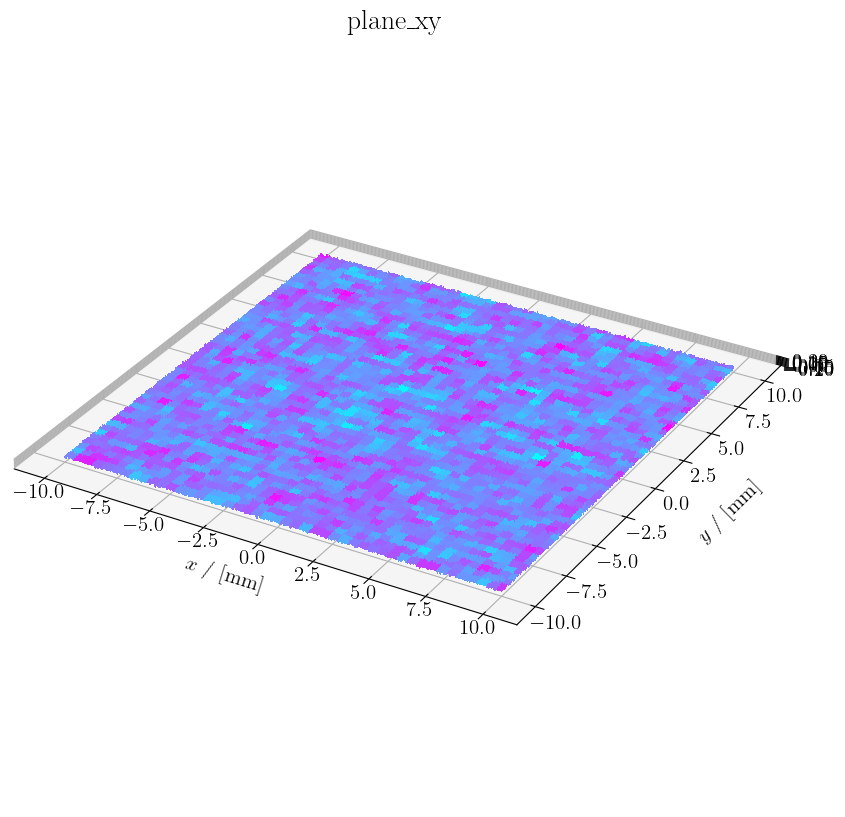

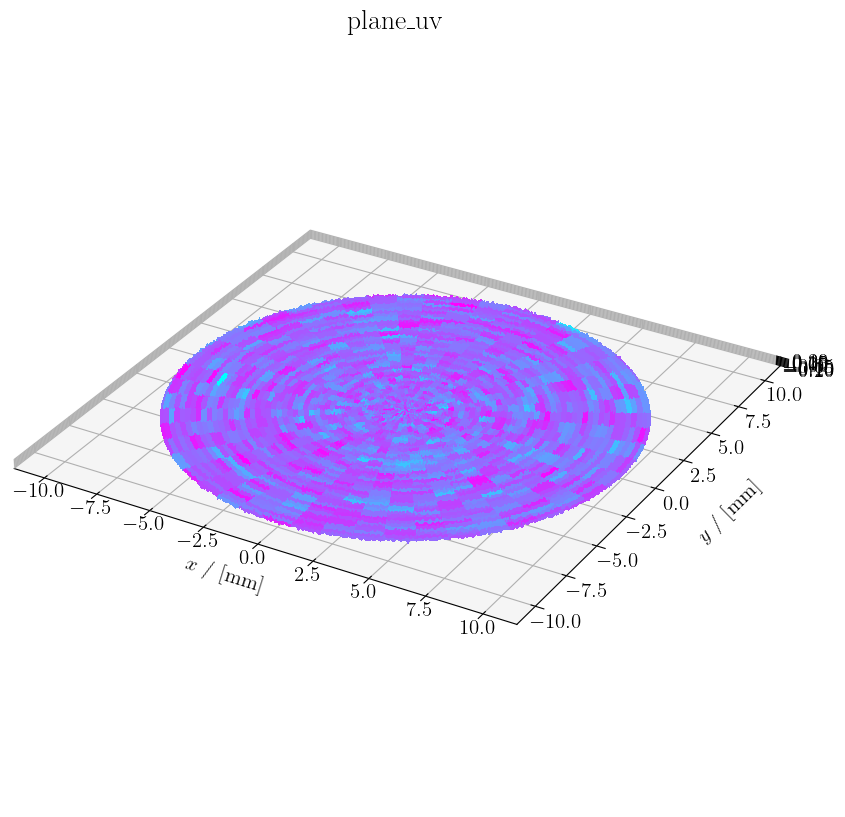

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from PyPO.System import System
from PyPO.Enums import FieldComponents, Units

SEED = 42

s = System()

plane_uv = {
            "name"      : "plane_uv",
            "gmode"     : "uv",
            "lims_u"    : np.array([0, 10]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([1001, 1000]),
            "rms"       : 42e-3,
            "rms_seed"  : SEED
            }

plane_xy = {
            "name"      : "plane_xy",
            "gmode"     : "xy",
            "lims_x"    : np.array([-10, 10]),
            "lims_y"    : np.array([-10, 10]),
            "gridsize"  : np.array([1001, 1001]),
            "rms"       : 42e-3,
            "rms_seed"  : SEED
            }

s.addPlane(plane_uv)
s.addPlane(plane_xy)

s.plot3D("plane_xy")
s.plot3D("plane_uv")

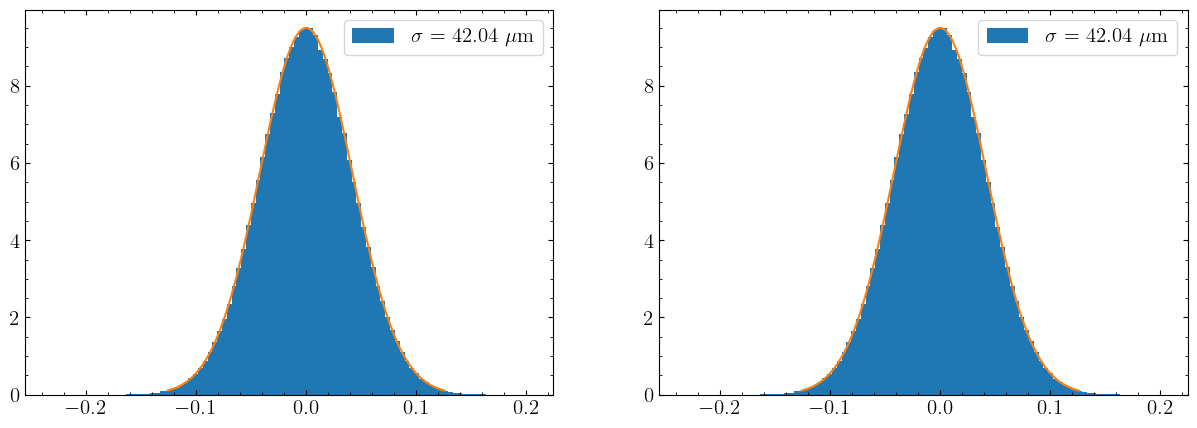

In [2]:
grids_xy = s.generateGrids("plane_xy")
grids_uv = s.generateGrids("plane_uv")

std_xy = np.nanstd(grids_xy.z)
std_uv = np.nanstd(grids_uv.z)

x = np.linspace(-3*42e-3, 3*42e-3, 100)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(grids_xy.z.ravel(), bins=100, density=True, label=r"$\sigma$ = {:.2f} $\mu$m".format(std_xy*1e3))
ax[1].hist(grids_uv.z.ravel(), bins=100, density=True, label=r"$\sigma$ = {:.2f} $\mu$m".format(std_uv*1e3))
ax[0].plot(x, stats.norm.pdf(x, 0, 42e-3))
ax[1].plot(x, stats.norm.pdf(x, 0, 42e-3))
ax[0].legend()
ax[1].legend()
plt.show()
